In [3]:
import pandas as pd

df = pd.read_csv('netflix daily top 10.csv')

In [14]:
# Tipos de dados disponíveis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7100 entries, 0 to 7099
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   As of                 7100 non-null   datetime64[ns]
 1   Rank                  7100 non-null   int64         
 2   Year to Date Rank     7100 non-null   object        
 3   Last Week Rank        7100 non-null   object        
 4   Title                 7100 non-null   object        
 5   Type                  7100 non-null   object        
 6   Netflix Exclusive     4599 non-null   object        
 7   Netflix Release Date  7100 non-null   object        
 8   Days In Top 10        7100 non-null   int64         
 9   Viewership Score      7100 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 554.8+ KB


In [7]:
# Extrair o período da análise
df['As of'] = pd.to_datetime(df['As of'])
df['As of'].min(), df['As of'].max()

(Timestamp('2020-04-01 00:00:00'), Timestamp('2022-03-11 00:00:00'))

In [8]:
# Tamanho da base de dados (7100 linhas e 10 colunas)
df.shape

(7100, 10)

In [9]:
# Verificar dados nulos
df.isna().sum()

As of                      0
Rank                       0
Year to Date Rank          0
Last Week Rank             0
Title                      0
Type                       0
Netflix Exclusive       2501
Netflix Release Date       0
Days In Top 10             0
Viewership Score           0
dtype: int64

In [11]:
df_null_values = df[df.isna().any(axis=1)]

In [13]:
df_null_values.shape

(2501, 10)

In [15]:
df['Netflix Exclusive'].value_counts()

Netflix Exclusive
Yes    4599
Name: count, dtype: int64

In [16]:
df.describe()

,As of,Rank,Days In Top 10,Viewership Score
count,7100,7100.000000,7100.000000,7100.000000
mean,2021-03-21 12:00:00.000000256,5.500000,24.123662,122.790141
min,2020-04-01 00:00:00,1.000000,1.000000,1.000000
25%,2020-09-25 00:00:00,3.000000,3.000000,19.000000
50%,2021-03-21 12:00:00,5.500000,7.000000,50.000000
75%,2021-09-15 00:00:00,8.000000,18.000000,128.000000
max,2022-03-11 00:00:00,10.000000,428.000000,1474.000000
std,NaN,2.872484,58.473789,213.861642


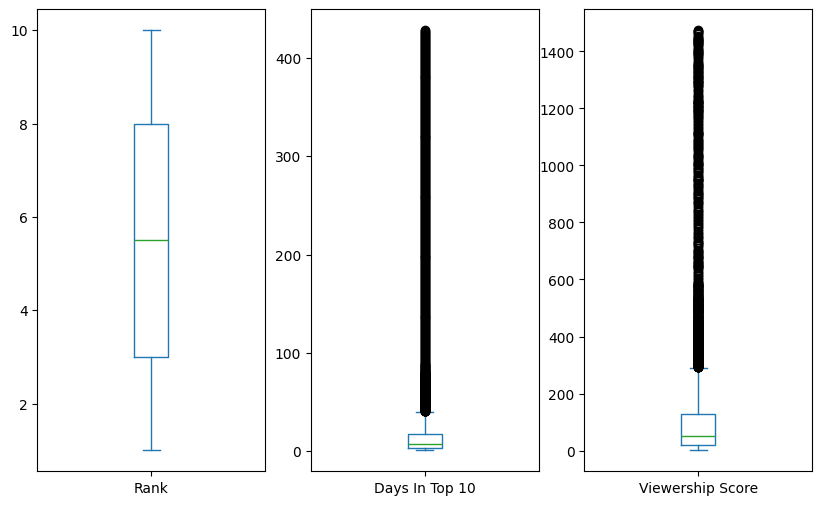

In [17]:
df.plot(kind='box',figsize=(10,6),subplots=True); 

In [20]:
# Outliers no campo 'Days In Top 10'
q1_days_in_top_10 = df['Days In Top 10'].quantile(0.25)
q3_days_in_top_10 = df['Days In Top 10'].quantile(0.75)

iqr_days_in_top_10 = q3_days_in_top_10 - q1_days_in_top_10
limiInf_days_in_top_10 = q1_days_in_top_10 - (iqr_days_in_top_10 * 1.5)
limiSup_days_in_top_10 = q3_days_in_top_10 + (iqr_days_in_top_10 * 1.5)

df[(df['Days In Top 10'] < limiInf_days_in_top_10) | (df['Days In Top 10'] > limiSup_days_in_top_10)].shape

(743, 10)

In [21]:
# Outliers no campo Viewership Score
q1_viewership_score = df['Viewership Score'].quantile(0.25)
q3_viewership_score = df['Viewership Score'].quantile(0.75)

iqr_viewership_score = q3_viewership_score - q1_days_in_top_10
limiInf_viewership_score = q1_viewership_score - (iqr_viewership_score * 1.5)
limiSup_viewership_score = q3_viewership_score + (iqr_viewership_score * 1.5)

df[(df['Viewership Score'] < limiInf_days_in_top_10) | (df['Viewership Score'] > limiSup_days_in_top_10)].shape

(3945, 10)

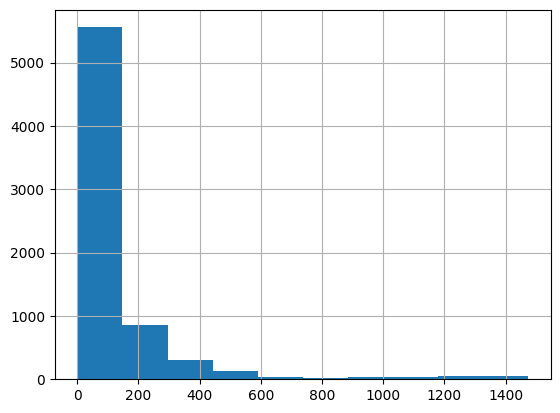

In [22]:
df['Viewership Score'].hist()

<Axes: >

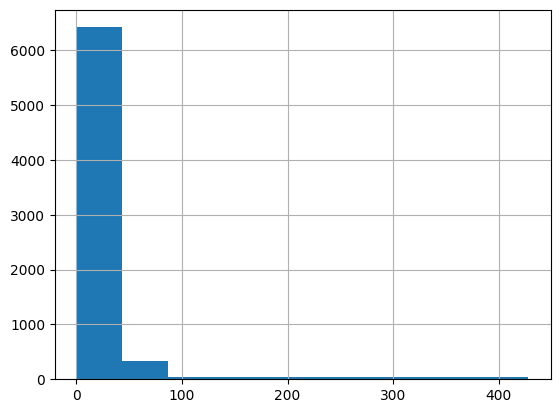

In [24]:
df['Days In Top 10'].hist()

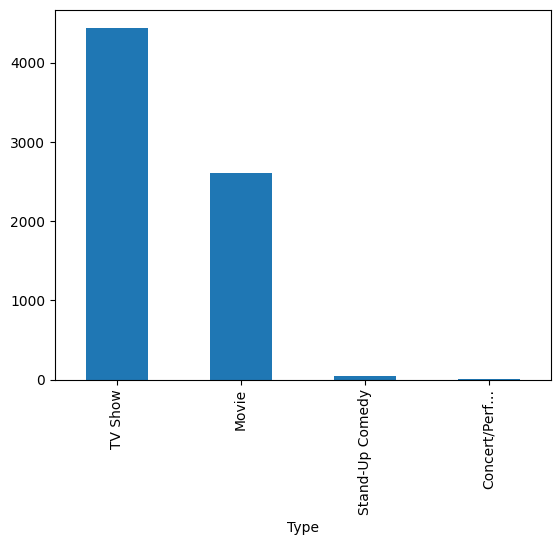

In [23]:
df.Type.value_counts().plot(kind='bar')